In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [34]:
from yahoofinancials import YahooFinancials

def getPrices(item):
    y = YahooFinancials(item).get_historical_price_data('2014-02-01', '2019-04-02', 'daily')
    prices = np.array([a['adjclose'] for a in y[item]['prices']])
    return prices[-1200:]

In [35]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)
results.pop('ARM')

{'buyAndHold': 0.0,
 'model': 23343321631.814606,
 'momentum': -0.9006630323947192,
 'perfect': 2.5821853064498856e+28,
 'sma': -0.9901599504898773,
 'model_opt': 4603395.423490779,
 'numPrices': 1200,
 'sma_model': -0.9886909285852785,
 'startLoss': 1.9490628186951984,
 'stochOscil': -0.9105960142830155,
 'momentum_model': 54.49513003130752,
 'predictions': [0.08903299272060394,
  0.03628402203321457,
  0.09005618840456009,
  0.047966018319129944,
  -0.0071062445640563965,
  0.07017708569765091,
  0.03626047819852829,
  0.0027251169085502625,
  -0.03326912224292755,
  -0.00016204267740249634,
  -0.06824430823326111,
  -0.007314644753932953,
  -0.05063329637050629,
  -0.08048227429389954,
  -0.04786023497581482,
  -0.06935256719589233,
  -0.005219168961048126,
  0.022283658385276794,
  0.07306533306837082,
  0.11577796190977097,
  0.15970106422901154,
  0.15500731766223907,
  0.1877400279045105,
  0.20989784598350525,
  0.14677125215530396,
  0.14019343256950378,
  0.09066545218229294,

In [36]:
len(results)

1076

In [37]:
results['F'].keys()

dict_keys(['startLoss', 'numEpochs', 'endMAE', 'opt_params', 'predictions', 'stochOscil_model', 'model', 'momentum', 'model_opt', 'sma', 'momentum_model', 'stochOscil', 'persist', 'perfect', 'sma_model', 'numPrices', 'endLoss', 'testPrices', 'budget', 'stock', 'startMAE', 'buyAndHold'])

In [38]:
modelProfs = [(item,results[item]['model']) for item in results ]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [39]:
pprint(modelProfs[0:10])

[('NFX', 1.641599314524604),
 ('CYH', 1.1563564191035582),
 ('GLG', 0.8041359871172994),
 ('SID', 0.7884021274429877),
 ('DBD', 0.7438755426112977),
 ('ODP', 0.7051661724926639),
 ('RRD', 0.6996594485568972),
 ('CELG', 0.6979019285628375),
 ('CRK', 0.6545101822318984),
 ('HHS', 0.6117994843886756)]


In [40]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]

In [41]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [42]:
pprint(modVSpers[0:10])

[('NFX', 1.7964697098571811),
 ('HHS', 1.0468566097543226),
 ('GSL', 0.914102785401782),
 ('PSYS', 0.8049999975642333),
 ('UCO', 0.7513049278572129),
 ('UNFI', 0.7489382503055335),
 ('CYH', 0.6988720428044676),
 ('SUNW', 0.6573033766720551),
 ('ODP', 0.6215200178914686),
 ('ALO', 0.6152145591798127)]


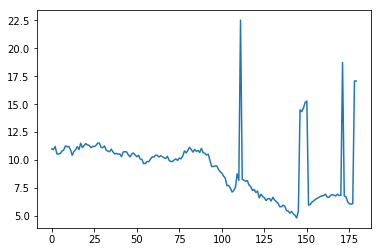

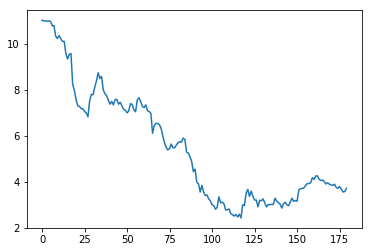

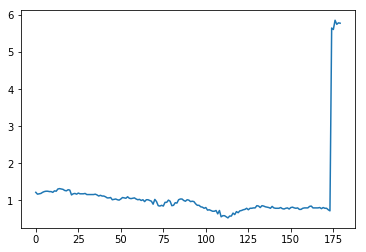

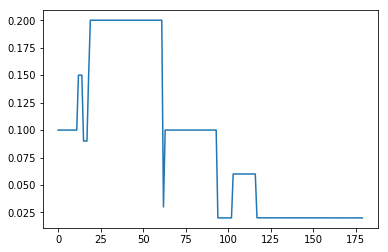

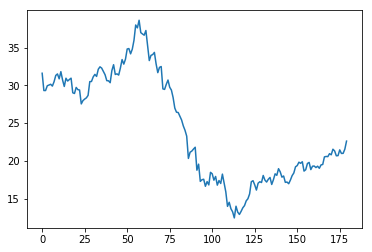

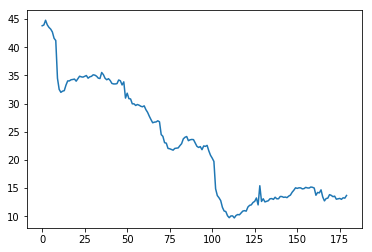

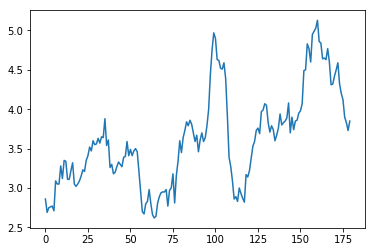

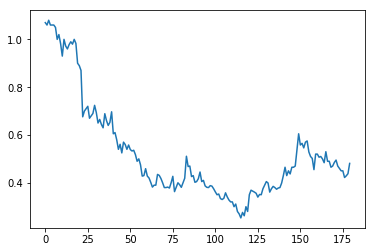

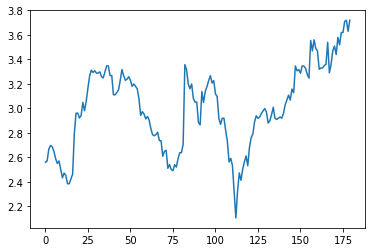

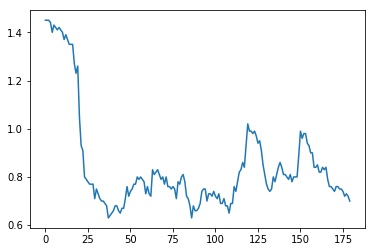

In [45]:
for a in modVSpers[0:10]:
    prices = getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

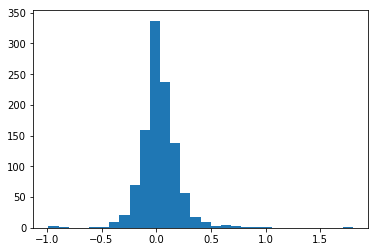

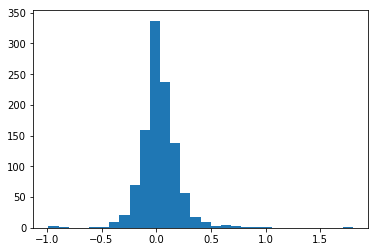

In [46]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

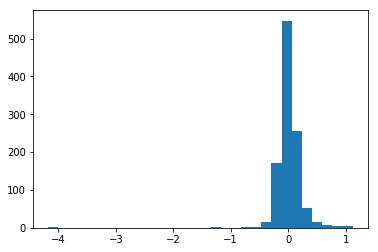

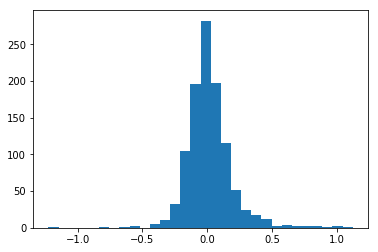

In [47]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [48]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])

In [49]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))

1076
0.6821561338289963
0.5520446096654275
0.5046468401486989


In [51]:
actualModProfs = [(item,getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

KeyError: 'AMGN'

In [52]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)

KeyError: 'AMGN'

In [53]:
actualModProfs[0:10]

NameError: name 'actualModProfs' is not defined

In [54]:
plt.hist([a[1] for a in actualModProfs])
plt.show()

NameError: name 'actualModProfs' is not defined

In [55]:
#prices = [items.getPrices(item)[-1] for item in results]
#buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [56]:
print(np.corrcoef(profs,pers)[0][1])
print(np.corrcoef(profs,perf)[0][1])
print(np.corrcoef(profs,bah)[0][1])
print(np.corrcoef(profs,mae)[0][1])
print(np.corrcoef(prof_perf_diff,mae)[0][1])

0.38115085753187505
-0.19416462735857734
0.4425023705548881
-0.24746345419681792
0.13672821467353594


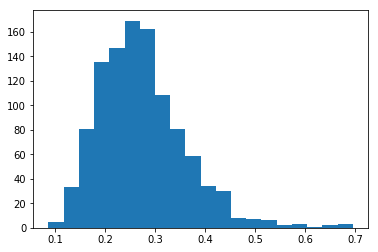

In [57]:
plt.hist(mae,20)
plt.show()